In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## plotting stuff
plt.rcParams['figure.figsize'] = [15,9]
plt.rcParams['figure.dpi'] = 150
plt.rcParams["xtick.labelsize"] = 20

In [2]:
df = pd.read_csv('breaches.csv')

In [3]:
breach = df.copy()

## Cleaning

In [4]:
## drop unnecessary columns

breach.drop(['Order','StudentName','StudentEmail','StudentBreachNo','BreachID','Number_records_breached',
             'Brief_breach_description','[2]. Sources(URLs)_of_Student_found_breach_description',
             '[13]. Free credit or ID theft monitoring services offered to victims (Yes=1, No=0)',
             '[14]. Duration of free credit / ID theft monitoring services (# of years)', 'Date_Breach_made_public',
             'Unnamed: 33','Unnamed: 34'], axis=1, inplace=True)

In [5]:
# rename columns for readability

breach.columns = ['year', 'hospital', 'state', 'breach_type', 'location', 'desc', 
                  'technical_control', 'process_control', 'people_control', 'insider',
                  'third_party', 'hacking', 'theft_loss', 'unintended_disclosure', 'discover_days',
                  'num_patients', 'cost_free_credit', 'hipaa', 'hipaa_fee', 'court_case',
                  'court_fee', 'remediation']

In [6]:
breach.head(3)

,year,hospital,state,breach_type,location,desc,technical_control,process_control,people_control,insider,...,theft_loss,unintended_disclosure,discover_days,num_patients,cost_free_credit,hipaa,hipaa_fee,court_case,court_fee,remediation
0,2018,AdventHealth Rollins Brook Hospital,TX,Loss,Paper/Films,Couldn’t find information,0,1,1,1,...,1,1,NaN,5000,0,1,0,0,0,1
1,2011,Adventist Behavioral Health,MD,PHYS,NaN,"Altamonte Springs, Fla.-based Adventist Health...",0,1,1,1,...,1,1,8,NaN,0,0,0,0,0,0
2,2013,Advocate Health and Hospitals Corporation,IL,Theft,Laptop,In the largest HIPAA enforcement settlement to...,0,1,1,0,...,1,0,30,4264,0,1,"5,550,000",0,0,1


In [7]:
sorted(list(breach['breach_type'].unique()))

['DISC',
 'HACK',
 'Hacking/IT Incident',
 'Hacking/IT Incident, Unauthorized Access/Disclosure',
 'INSD',
 'Improper Disposal',
 'Loss',
 'Loss, Theft',
 'Other',
 'Other, Theft',
 'Other, Unauthorized Access/Disclosure',
 'Other, Unknown',
 'PHYS',
 'PORT',
 'STAT',
 'Theft',
 'Theft, Unauthorized Access/Disclosure',
 'UNKN',
 'Unauthorized Access/Disclosure',
 'Unknown']

In [8]:
## Consolidate the different types of breaches

typesDict = {
    'DISC' : ['DISC'],
    'INSD' : ['INSD'],
    'HACK': ['HACK','Hacking/IT Incident', 
             'Hacking/IT Incident, Unauthorized Access/Disclosure'],
    'Loss': ['Loss', 'Loss, Theft'],
    'PHYS' : ['PHYS'],
    'PORT' : ['PORT'],
    'STAT' : ['STAT'],
    'Theft': ['Theft', 'Theft, Unauthorized Access/Disclosure', 'Other, Theft'],
    'Unauthorized Disclosure': ['Unauthorized Access/Disclosure', 
                                'Other, Unauthorized Access/Disclosure'],    
    'Improper Disposal' : ['Improper Disposal'],   
    'Other': ['Other', 'Other, Unknown', 'UNKN', 'Unknown']
}

for key in typesDict.keys():
    breach.breach_type.replace(to_replace=typesDict[key], value=key, inplace=True)

breach.breach_type.unique()

array(['Loss', 'PHYS', 'Theft', 'STAT', 'HACK', 'Unauthorized Disclosure',
       'PORT', 'Improper Disposal', 'INSD', 'Other', 'DISC'], dtype=object)

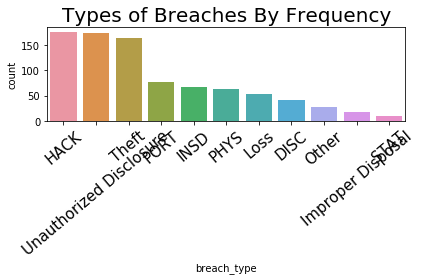

In [9]:
## plot the breach types by frequency

ax = sns.countplot(x='breach_type',data=breach, order=breach['breach_type'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=40)
ax.set_title("Types of Breaches By Frequency", fontsize=20)
plt.tight_layout()

plt.show()

# breach['breach_type'].value_counts().plot(kind='bar')

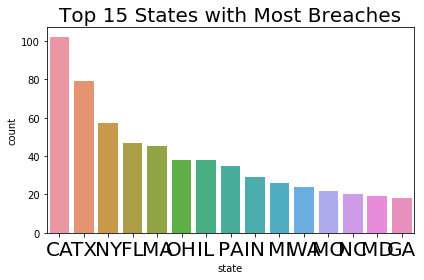

In [10]:
## plot the breaches by state frequency

ax = sns.countplot(x='state',data=breach, order=breach['state'].value_counts().index[:15])

ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_title("Top 15 States with Most Breaches", fontsize=20)
plt.tight_layout()
plt.show()

In [11]:
breach.location.fillna("Unspecified", inplace=True)
sorted(list(breach['location'].unique()))

['Desktop Computer',
 'Desktop Computer, Electronic Medical Record',
 'Desktop Computer, Electronic Medical Record, Email, Laptop, Network Server',
 'Desktop Computer, Electronic Medical Record, Laptop, Network Server',
 'Desktop Computer, Electronic Medical Record, Network Server',
 'Desktop Computer, Electronic Medical Record, Other',
 'Desktop Computer, Email',
 'Desktop Computer, Email, Laptop, Network Server',
 'Desktop Computer, Email, Network Server',
 'Desktop Computer, Laptop',
 'Desktop Computer, Network Server',
 'Desktop Computer, Other',
 'Desktop Computer, Other Portable Electronic Device, Paper/Films',
 'Desktop Computer, Paper/Films',
 'Electronic Medical Record',
 'Electronic Medical Record, Email',
 'Electronic Medical Record, Email, Laptop, Paper/Films',
 'Electronic Medical Record, Network Server',
 'Electronic Medical Record, Network Server, Other',
 'Electronic Medical Record, Other',
 'Electronic Medical Record, Paper/Films',
 'Electronic Medical Record/CD',
 'Em

In [12]:
## Consolidate the different breach locations

locsDict = {
    'Desktop Computer' : '(?i)Desktop Computer?.+',
    'Electronic Medical Record': '(?i)Electronic Medical Record?.+',
    'Email': '(?i)Email?.+',
    'Laptop': '(?i)Laptop?.+',
    'Network Server': '(?i)Network Server?.+',
    'Paper/Films': ['Paper/Films'],
    'Other': '^(?!.*^(Desktop Computer|Electronic Medical Record|Email|Laptop|Network Server|Paper/Films)).*'
}

for key in locsDict.keys():
    breach.location.replace(to_replace=locsDict[key], value=key, regex=True, inplace=True)

sorted(list(breach['location'].unique()))

['Desktop Computer',
 'Electronic Medical Record',
 'Email',
 'Laptop',
 'Network Server',
 'Other',
 'Paper/Films']

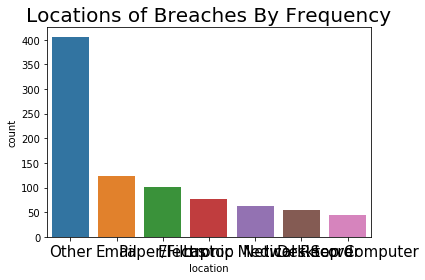

In [13]:
## plot the breaches by location frequency

ax = sns.countplot(x='location',data=breach, order=breach['location'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_title("Locations of Breaches By Frequency", fontsize=20)
plt.tight_layout()
plt.show()

In [14]:
breach.remediation.value_counts()

1                                                                     469
0                                                                     270
no actions mentioned to correct breach                                  3
No Data Available - Cannot be determined                                3
"Not Disclosed"                                                         3
UNKNOWN                                                                 3
"No Info on Breach"                                                     2
No information                                                          2
no actions were specified                                               1
only states "it appers they will revisit their encryption process"      1
could not find any source information regarding breach                  1
cannot be determined                                                    1
Name: remediation, dtype: int64

In [15]:
## make the amount columns to be strictly numerical
## if there is text, then set it to 0 (there aren't that many of these cases)

num_cols = ['discover_days', 'num_patients', 'cost_free_credit', 'hipaa', 'hipaa_fee', 'court_case', 'court_fee', 'remediation']
for col in range(len(num_cols)):
    breach[num_cols[col]] = breach[num_cols[col]].apply(pd.to_numeric, errors='coerce')
    breach[num_cols[col]].fillna(0, inplace=True)

breach.remediation.value_counts()

1.0    469
0.0    400
Name: remediation, dtype: int64

In [16]:
breach.hacking.value_counts()

0                                                         662
1                                                         185
"No Info on Breach"                                         2
No Data Available - Cannot be determined                    2
could not find any source information regarding breach      1
Name: hacking, dtype: int64

In [17]:
## remove records with not enough info about breach (very few records):

def filterRecords(row):
    if str(row) != '0' and str(row) != '1':
        return 'noInfo'

cols = ['technical_control', 'process_control', 'people_control', 'insider', 
        'third_party', 'hacking', 'theft_loss', 'unintended_disclosure']

for i in range(len(cols)):
    noInfo = breach[cols[i]].apply(filterRecords)
    noInfo_index = breach.index[noInfo == 'noInfo']
    breach.drop(noInfo_index, inplace=True)
    
breach.hacking.value_counts()

0    639
1    182
Name: hacking, dtype: int64

In [18]:
breach.shape

(821, 22)

## Cleaning Done

In [19]:
breach.to_csv('cleaned_breaches.csv',index=False)

In [20]:
df = pd.read_csv('cleaned_breaches.csv')
df.shape

(821, 22)

## Analysis

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
df.head(3)

,year,hospital,state,breach_type,location,desc,technical_control,process_control,people_control,insider,...,theft_loss,unintended_disclosure,discover_days,num_patients,cost_free_credit,hipaa,hipaa_fee,court_case,court_fee,remediation
0,2018,AdventHealth Rollins Brook Hospital,TX,Loss,Paper/Films,Couldn’t find information,0,1,1,1,...,1,1,0.0,5000.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2011,Adventist Behavioral Health,MD,PHYS,Other,"Altamonte Springs, Fla.-based Adventist Health...",0,1,1,1,...,1,1,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013,Advocate Health and Hospitals Corporation,IL,Theft,Laptop,In the largest HIPAA enforcement settlement to...,0,1,1,0,...,1,0,30.0,4264.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
X = df.loc[:,['technical_control','process_control','people_control']].values
y = df.loc[:,['hipaa']].values

### Linear Regression

In [24]:
LinReg = LinearRegression()
OLS = LinReg.fit(X,y)
OLS.coef_

array([[0.07553077, 0.08020425, 0.09182933]])

### Logisitic Regression

In [25]:
LogReg = LogisticRegression(fit_intercept = True)
model = LogReg.fit(X,y)
model.coef_

array([[0.34474073, 0.36199009, 0.41103926]])

The coefficents are 0.34 for technical, 0.36 for process, and 0.41 for people control **weaknesses**.

People controls seems to be the most important factor when it comes to HIPAA violation. Therefore, having strong people controls in place is the most guaranteed way to ensuring no HIPAA violations occur.